In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

https://machinelearningmastery.com/grid-search-arima-hyperparameters-with-python/
https://www.machinelearningplus.com/time-series/arima-model-time-series-forecasting-python/

In [2]:
hw_raw = pd.read_csv("dataset/hw.csv", engine='python',sep='};',names=["date","sales"])

In [3]:
hw_raw.head()

,date,sales
0,2003.01.05,736.780
1,2003.01.12,198.297
2,2003.01.19,138.449
3,2003.01.26,92.493
4,2003.02.02,92.486


In [4]:
hw_raw['date'] =  pd.to_datetime(hw_raw['date'])

In [5]:
hw_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    679 non-null    datetime64[ns]
 1   sales   679 non-null    object        
dtypes: datetime64[ns](1), object(1)
memory usage: 10.7+ KB


In [6]:
hw_raw["sales"]=hw_raw['sales'].apply(lambda x: int(str(x).replace(".","")))

In [7]:
hw=hw_raw.set_index('date')

In [8]:
hw.head(10)

,sales
date,
2003-01-05,736780
2003-01-12,198297
2003-01-19,138449
2003-01-26,92493
2003-02-02,92486
2003-02-09,75934
2003-02-16,219500
2003-02-23,163000
2003-03-02,145200


In [9]:
hw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679 entries, 2003-01-05 to 2016-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   sales   679 non-null    int64
dtypes: int64(1)
memory usage: 10.6 KB


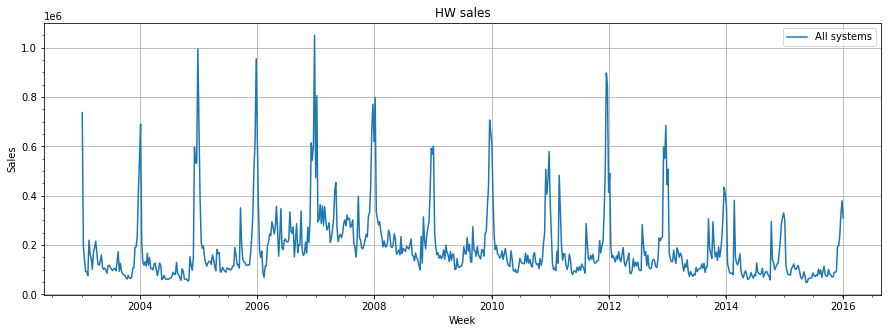

In [10]:
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(hw, label="All systems")
plt.xlabel('Week') 
plt.ylabel('Sales')
plt.legend()
plt.title("HW sales");

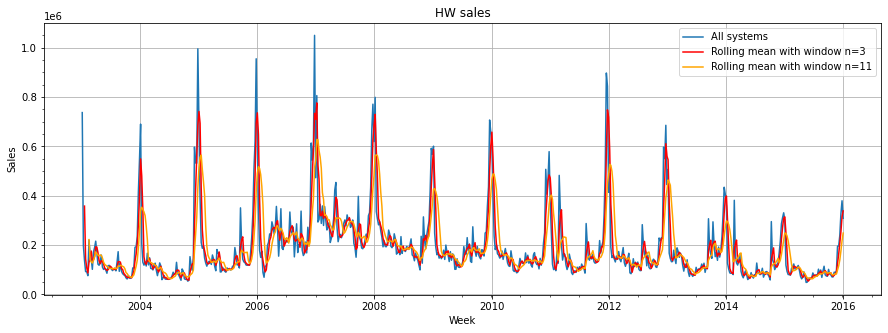

In [11]:
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(hw, label="All systems")
plt.plot(hw.rolling(window=3).mean(), c="r", label="Rolling mean with window n=3")
plt.plot(hw.rolling(window=7).mean(), c="orange", label="Rolling mean with window n=11")
plt.xlabel('Week') 
plt.ylabel('Sales')
plt.legend()
plt.title("HW sales");
df=hw.copy()

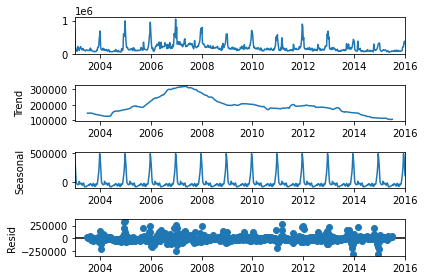

In [12]:
sd_hw = seasonal_decompose(hw, model="additive")
#plt.figure(figsize=(10,7))
sd_hw.plot();

In [13]:
hw_trend=hw.copy()
hw_trend['sales']=hw['sales']-sd_hw.seasonal

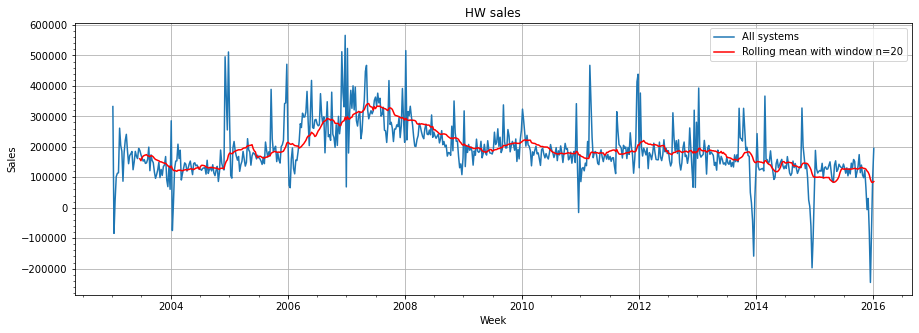

In [14]:
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(hw_trend, label="All systems")
plt.plot(hw_trend.rolling(window=25).mean(), c="r", label="Rolling mean with window n=20")
plt.xlabel('Week') 
plt.ylabel('Sales')
plt.legend()
plt.title("HW sales");

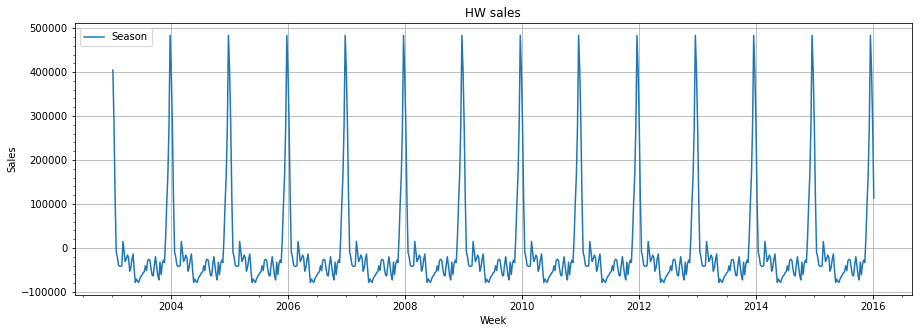

In [15]:
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(sd_hw.seasonal, label="Season")
plt.xlabel('Week') 
plt.ylabel('Sales')
plt.legend()
plt.title("HW sales");

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [89]:
train_size=620
train, test = hw_trend[0:train_size], hw_trend[train_size:]

model = ARIMA(train, order=(5,0,2))
model_fit = model.fit()

D:\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'
D:\anaconda3\envs\datascience\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  warnings.warn('No frequency information was'


In [90]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  620
Model:                 ARIMA(5, 0, 2)   Log Likelihood               -7748.429
Date:                Sun, 28 Mar 2021   AIC                          15514.858
Time:                        16:17:49   BIC                          15554.726
Sample:                    01-05-2003   HQIC                         15530.355
                         - 11-16-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.982e+05   2.09e+04      9.463      0.000    1.57e+05    2.39e+05
ar.L1          0.2583      3.834      0.067      0.946      -7.256       7.773
ar.L2          1.0735      4.590      0.234      0.8

In [91]:
len(test)

59

In [92]:
fc = model_fit.forecast(len(test), alpha=0.05)  # 95% con

In [93]:
fc.head(20)

2014-11-23    138988.794839
2014-11-30    140742.708149
2014-12-07    146630.016525
2014-12-14    149092.222251
2014-12-21    150950.123787
2014-12-28    151897.613116
2015-01-04    152818.390565
2015-01-11    153262.336227
2015-01-18    153877.065828
2015-01-25    154173.437461
2015-02-01    154678.416097
2015-02-08    154935.012001
2015-02-15    155393.048429
2015-02-22    155642.105768
2015-03-01    156073.869706
2015-03-08    156324.435787
2015-03-15    156737.358658
2015-03-22    156991.403803
2015-03-29    157388.691747
2015-04-05    157646.094903
Freq: W-SUN, Name: predicted_mean, dtype: float64

In [94]:
df_pred=model_fit.predict()

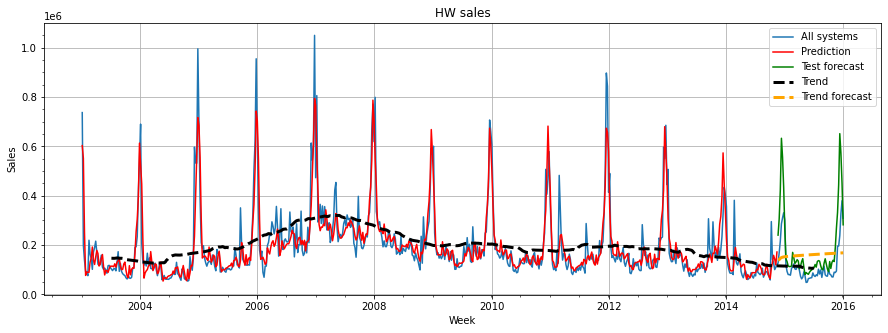

In [95]:
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot(hw_trend["sales"]+sd_hw.seasonal, label="All systems")
plt.plot(df_pred+sd_hw.seasonal[0:train_size], c="r", label="Prediction")
plt.plot(fc+sd_hw.seasonal[train_size:], c="g", label="Test forecast")
plt.plot(sd_hw.trend, label="Trend",c="k",linewidth=3,linestyle='dashed')
plt.plot(fc, label="Trend forecast",c="orange",linewidth=3,linestyle='dashed')
plt.xlabel('Week') 
plt.ylabel('Sales')
plt.legend()
plt.title("HW sales");


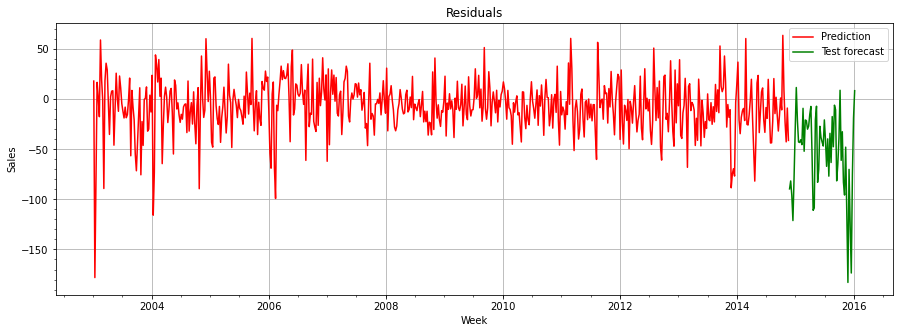

In [96]:
plt.figure(figsize=(15,5))
plt.grid()
plt.minorticks_on()
plt.plot( (hw["sales"][0:train_size]-df_pred-sd_hw.seasonal[0:train_size])*100/hw["sales"][0:train_size]  , c="r", label="Prediction")
plt.plot( (hw["sales"][train_size:]-fc-sd_hw.seasonal[train_size:])*100/hw["sales"][train_size:], c="g", label="Test forecast")
plt.xlabel('Week') 
plt.ylabel('Sales')
plt.legend()
plt.title("Residuals");